In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
import visualize
import world_generator
import evaluation
import projections

In [4]:
# enable animations to render inline.
# requires ffmpeg to be installed (`sudo apt install ffmpeg`)
rc('animation', html='html5')

In [5]:
N_a, M_a, g_ba = world_generator.generate_world(num_regions=256, spread_rate=0.2, self_spread_rate=2.0)
# N_a, M_a, g_ba

In [6]:
N_a.shape, M_a.shape, g_ba.shape

((256,), (256, 256), (64, 256))

In [7]:
results = evaluation.evaluate(
    M_a,
    projection_method=projections.Projections().sub_matrix_eigenvector,
    g_bas=[g_ba],
    N_a_0=N_a,
    num_steps=200,
    intervention_strategy=False)

In [8]:
results = evaluation.evaluate(
    M_a,
    projection_method=projections.Projections().sub_matrix_eigenvector,
    g_bas=[g_ba],
    N_a_0=N_a,
    num_steps=100,
    lock_down_threshold=10,
    re_open_threshold=0.5,
    intervention_strategy=True)

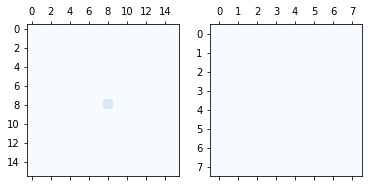

In [9]:
anim = visualize.animate_results(results)

In [10]:
anim